In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# import graphviz
import pyarrow

# from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

sns.set_style("white")
plt.rcParams['figure.dpi'] = 300

In [44]:

file_path = r'C:\Users\wziller\Milwaukee Tool\_Global AME\MSOE\CS5610\M6\csc5610base\GroupProjectM6\Award_Batting_HOF_FE.csv'
Awards_Batting_HoF_df = pd.read_feather(file_path)

Awards_Batting_HoF_df.describe()
# OG
# Awards_Batting_HoF_df = pd.read_feather("Awards_Batting_HoF.feather")

c:\Program Files\Python311\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Program Files\Python311\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Program Files\Python311\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Program Files\Python311\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,years_played,total_games,total_at_bats,total_runs,total_hits,total_walks,total_doubles,total_triples,total_home_runs,total_RBI,...,BattingPost_IBB,BattingPost_HBP,BattingPost_SH,BattingPost_SF,BattingPost_GIDP,total_singles,batting_avg,OBP,SLG,OPS
count,18727.000000,1.872700e+04,1.872700e+04,1.872700e+04,1.872700e+04,1.872700e+04,1.872700e+04,1.872700e+04,1.872700e+04,1.872700e+04,...,1.872700e+04,18727.000000,18727.000000,18727.000000,18727.000000,1.872700e+04,1.670400e+04,1.674700e+04,1.670400e+04,1.670400e+04
mean,5.014044,-1.487953e+04,1.324396e+04,3.163116e+04,-1.275887e+04,2.445671e+04,1.226642e+04,2.002405e+03,8.942243e+03,3.059032e+04,...,2.109332e+02,56.456880,81.506969,66.698510,203.900732,-3.596994e+04,inf,inf,inf,inf
std,4.617862,4.199124e+05,2.565213e+05,5.257102e+05,3.190789e+05,3.796602e+05,2.135640e+05,3.722253e+04,1.916433e+05,5.433306e+05,...,9.481874e+03,1321.189992,1548.209050,2099.290066,3550.592596,7.181333e+05,NaN,NaN,NaN,NaN
min,0.000000,-3.235781e+07,-6.892160e+06,-1.646400e+06,-2.750177e+07,-3.286800e+05,0.000000e+00,0.000000e+00,0.000000e+00,-7.570500e+05,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-6.161249e+07,-3.075000e+02,-6.910000e+02,-4.215000e+02,-6.952644e+02
25%,1.000000,7.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.134480e-01,0.000000e+00,9.161932e-02
50%,3.000000,4.700000e+01,2.100000e+01,6.000000e+00,7.000000e+00,4.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,4.000000e+00,1.583156e-01,2.380952e-01,1.730769e-01,4.032648e-01
75%,7.000000,2.085000e+02,1.300000e+02,7.900000e+01,7.900000e+01,5.000000e+01,2.500000e+01,5.000000e+00,5.000000e+00,6.600000e+01,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,4.700000e+01,2.692308e-01,5.000000e-01,3.243243e-01,7.467032e-01
max,27.000000,7.320600e+06,1.146600e+07,2.849666e+07,5.632200e+06,1.788998e+07,1.423649e+07,2.452320e+06,1.805026e+07,3.515299e+07,...,1.215984e+06,82026.000000,87360.000000,231616.000000,171000.000000,2.261952e+06,inf,inf,inf,inf


In [45]:
# Awards_Batting_HoF_df[['Batting_df_G', 'Batting_df_AB', 'Batting_df_R', 'Batting_df_H', 'Batting_df_2B', 'Batting_df_3B', 'Batting_df_HR', 'Batting_df_RBI', 'Batting_df_SB', 'Batting_df_CS', 'Batting_df_BB', 'Batting_df_SO', 'Batting_df_IBB', 'Batting_df_HBP', 'Batting_df_SH', 'Batting_df_SF', 'Batting_df_GIDP', 'BattingPost_df_G', 'BattingPost_df_AB', 'BattingPost_df_R', 'BattingPost_df_H', 'BattingPost_df_2B', 'BattingPost_df_3B', 'BattingPost_df_HR', 'BattingPost_df_RBI', 'BattingPost_df_SB', 'BattingPost_df_CS', 'BattingPost_df_BB', 'BattingPost_df_SO', 'BattingPost_df_IBB', 'BattingPost_df_HBP', 'BattingPost_df_SH', 'BattingPost_df_SF', 'BattingPost_df_GIDP']] = Awards_Batting_HoF_df[['Batting_df_G', 'Batting_df_AB', 'Batting_df_R', 'Batting_df_H', 'Batting_df_2B', 'Batting_df_3B', 'Batting_df_HR', 'Batting_df_RBI', 'Batting_df_SB', 'Batting_df_CS', 'Batting_df_BB', 'Batting_df_SO', 'Batting_df_IBB', 'Batting_df_HBP', 'Batting_df_SH', 'Batting_df_SF', 'Batting_df_GIDP', 'BattingPost_df_G', 'BattingPost_df_AB', 'BattingPost_df_R', 'BattingPost_df_H', 'BattingPost_df_2B', 'BattingPost_df_3B', 'BattingPost_df_HR', 'BattingPost_df_RBI', 'BattingPost_df_SB', 'BattingPost_df_CS', 'BattingPost_df_BB', 'BattingPost_df_SO', 'BattingPost_df_IBB', 'BattingPost_df_HBP', 'BattingPost_df_SH', 'BattingPost_df_SF', 'BattingPost_df_GIDP']].abs()

Awards_Batting_HoF_df[[
    'total_games', 'total_at_bats', 'total_runs', 'total_hits',
    'total_doubles', 'total_triples', 'total_home_runs', 'total_RBI',
    'total_SB', 'total_CS', 'total_BB', 'total_SO', 'total_IBB',
    'total_HBP', 'total_SH', 'total_SF', 'total_GIDP', 'batting_avg',
    'OBP', 'SLG', 'OPS', 'BattingPost_G', 'BattingPost_AB', 'BattingPost_R',
    'BattingPost_H', 'BattingPost_2B', 'BattingPost_3B', 'BattingPost_HR',
    'BattingPost_RBI', 'BattingPost_SB', 'BattingPost_CS', 'BattingPost_BB',
    'BattingPost_SO', 'BattingPost_IBB', 'BattingPost_HBP', 'BattingPost_SH',
    'BattingPost_SF', 'BattingPost_GIDP'
]]

,total_games,total_at_bats,total_runs,total_hits,total_doubles,total_triples,total_home_runs,total_RBI,total_SB,total_CS,...,BattingPost_RBI,BattingPost_SB,BattingPost_CS,BattingPost_BB,BattingPost_SO,BattingPost_IBB,BattingPost_HBP,BattingPost_SH,BattingPost_SF,BattingPost_GIDP
0,331,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1879200,1320000,2608800,-1004400,748800,117600,906000,1834800,288000,87600,...,147200,0,0,46000,119600,0,0,0,0,18400
2,181,176,102,216,42,6,13,94,9,8,...,0,0,0,0,0,0,0,0,0,0
3,448,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15,21,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18722,16,18,3,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18723,209,-21,41,109,17,2,2,20,2,0,...,0,0,0,0,0,0,0,0,0,0
18724,266,142,5,21,2,1,0,7,0,1,...,0,0,0,0,0,0,0,0,0,0
18725,-146,256,167,-148,76,15,30,202,46,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
print(Awards_Batting_HoF_df.columns.tolist())
Awards_Batting_HoF_df.info()

['playerID', 'years_played', 'total_games', 'total_at_bats', 'total_runs', 'total_hits', 'total_walks', 'total_doubles', 'total_triples', 'total_home_runs', 'total_RBI', 'total_SB', 'total_CS', 'total_BB', 'total_SO', 'total_IBB', 'total_HBP', 'total_SH', 'total_SF', 'total_GIDP', 'HOF_status', 'HOF_year', 'BattingPost_G', 'BattingPost_AB', 'BattingPost_R', 'BattingPost_H', 'BattingPost_2B', 'BattingPost_3B', 'BattingPost_HR', 'BattingPost_RBI', 'BattingPost_SB', 'BattingPost_CS', 'BattingPost_BB', 'BattingPost_SO', 'BattingPost_IBB', 'BattingPost_HBP', 'BattingPost_SH', 'BattingPost_SF', 'BattingPost_GIDP', 'total_singles', 'batting_avg', 'OBP', 'SLG', 'OPS']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18727 entries, 0 to 18726
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   playerID          18727 non-null  object 
 1   years_played      18727 non-null  int64  
 2   total_games       18727 non-n

In [47]:
Awards_Batting_HoF_df.head()

,playerID,years_played,total_games,total_at_bats,total_runs,total_hits,total_walks,total_doubles,total_triples,total_home_runs,...,BattingPost_IBB,BattingPost_HBP,BattingPost_SH,BattingPost_SF,BattingPost_GIDP,total_singles,batting_avg,OBP,SLG,OPS
0,aardsda01,9,331,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
1,aaronha01,23,-1879200,1320000,2608800,-1004400,1682400,748800,117600,906000,...,0,0,0,0,18400,-2776800,-0.760909,0.225819,0.700909,0.926728
2,aaronto01,7,181,176,102,216,86,42,6,13,...,0,0,0,0,0,155,1.227273,1.152672,1.409091,2.561763
3,aasedo01,13,448,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
4,abadan01,3,15,21,1,2,4,0,0,0,...,0,0,0,0,0,2,0.095238,0.240000,0.095238,0.335238


In [48]:
Awards_Batting_HoF_df = Awards_Batting_HoF_df.drop_duplicates(subset=['playerID'])

In [49]:
# OG
# X = Awards_Batting_HoF_df[['Batting_df_G', 'Batting_df_AB', 'Batting_df_R', 'Batting_df_H', 'Batting_df_2B', 'Batting_df_3B', 'Batting_df_HR', 'Batting_df_RBI', 'Batting_df_SB', 'Batting_df_CS', 'Batting_df_BB', 'Batting_df_SO', 'Batting_df_IBB', 'Batting_df_HBP', 'Batting_df_SH', 'Batting_df_SF', 'Batting_df_GIDP']]
X = Awards_Batting_HoF_df[[
    'total_games', 'total_at_bats', 'total_runs', 'total_hits',
    'total_doubles', 'total_triples', 'total_home_runs', 'total_RBI',
    'total_SB', 'total_CS', 'total_BB', 'total_SO', 'total_IBB',
    'total_HBP', 'total_SH', 'total_SF', 'total_GIDP', 'batting_avg',
    'OBP', 'SLG', 'OPS', 'BattingPost_G', 'BattingPost_AB', 'BattingPost_R',
    'BattingPost_H', 'BattingPost_2B', 'BattingPost_3B', 'BattingPost_HR',
    'BattingPost_RBI', 'BattingPost_SB', 'BattingPost_CS', 'BattingPost_BB',
    'BattingPost_SO', 'BattingPost_IBB', 'BattingPost_HBP', 'BattingPost_SH',
    'BattingPost_SF', 'BattingPost_GIDP'
]]

inf_columns = X.columns[(X == float('inf')).any()].tolist()
print(f"Columns with infinity values: {inf_columns}")




y = Awards_Batting_HoF_df['HOF_status']
# Ensure y is categorical
y = y.astype('category')
y = y.dropna()




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model_1 = LogisticRegression()
log_model_1.fit(X_train_scaled, y_train)

y_pred = log_model_1.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Columns with infinity values: ['batting_avg', 'OBP', 'SLG', 'OPS']


ValueError: Found input variables with inconsistent numbers of samples: [18727, 1239]

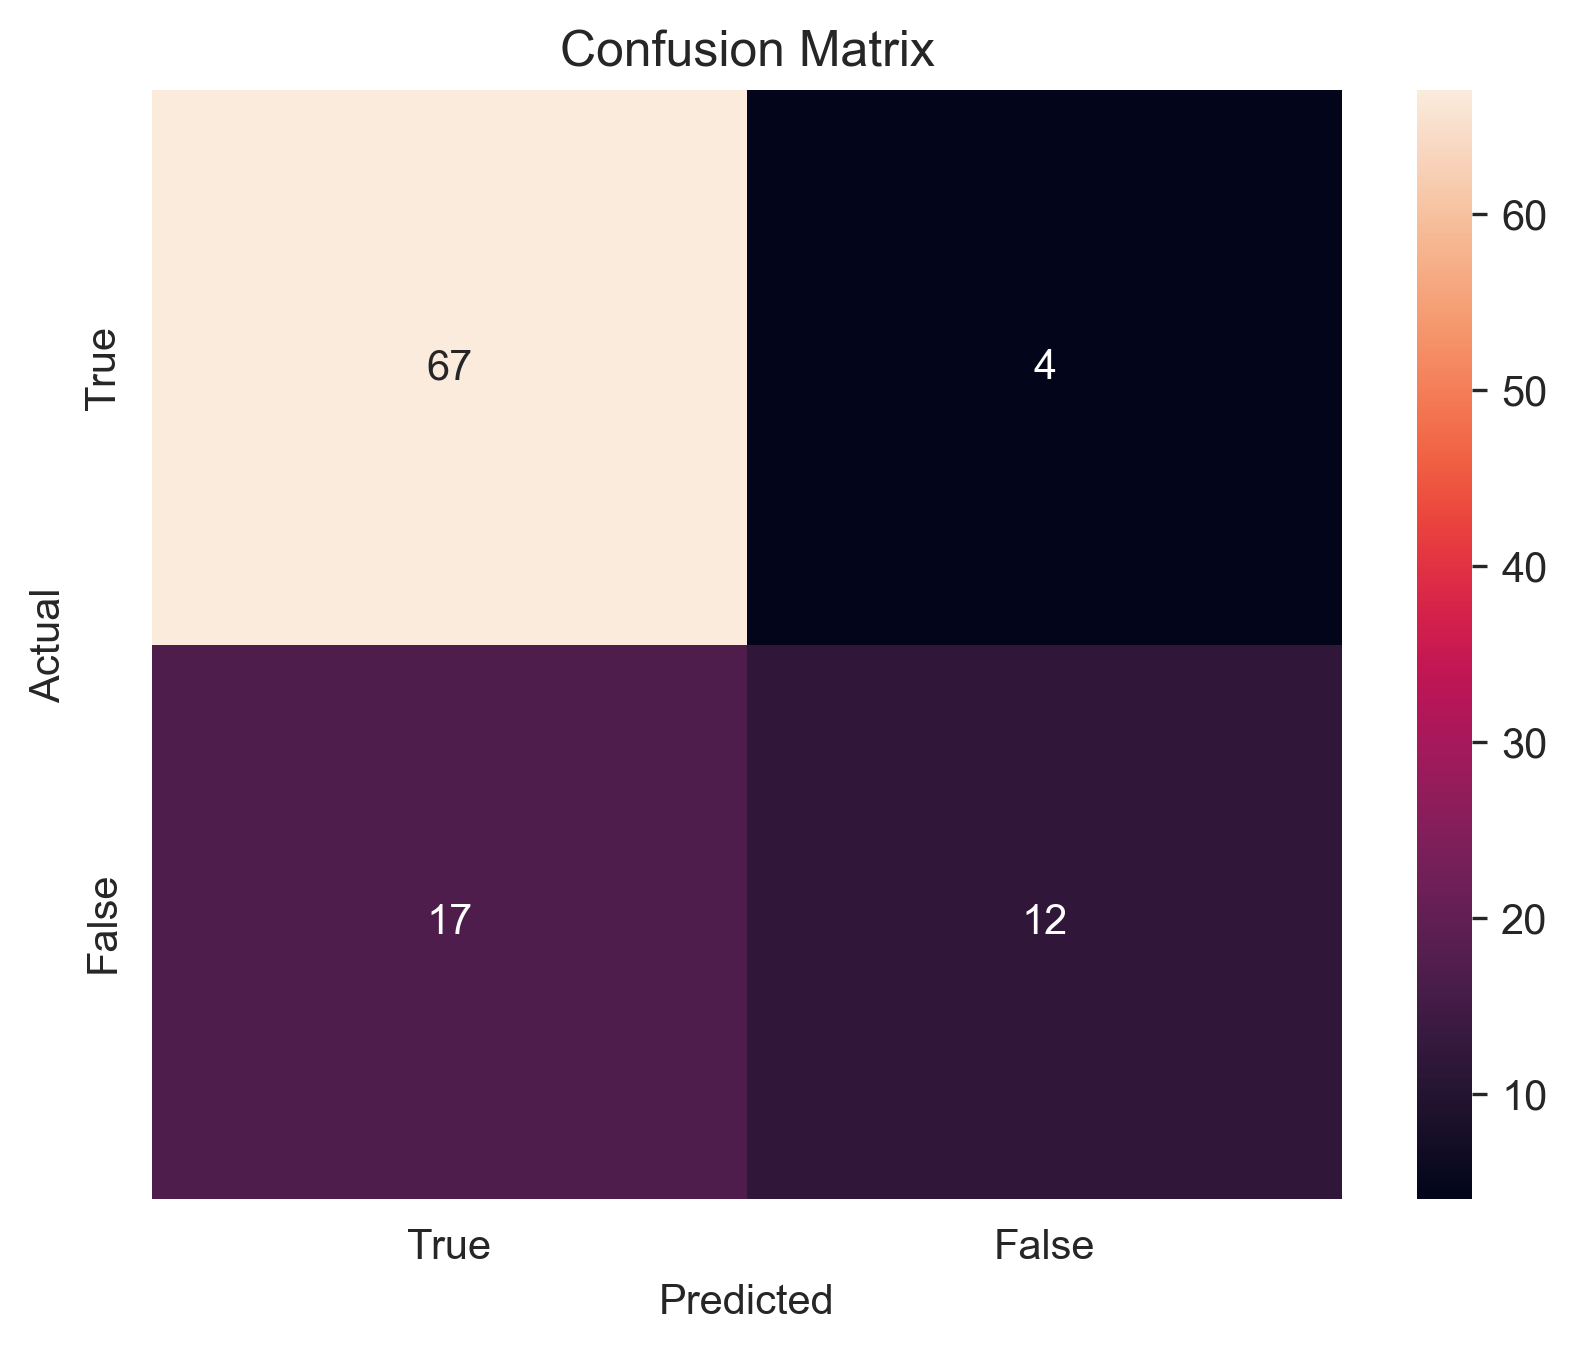

<Figure size 1920x1440 with 0 Axes>

In [ ]:
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', 
            xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

plt.savefig('log_model_1.png')

In [ ]:
importance = log_model_1.coef_[0]  
feature_names = X.columns  

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df['Absolute Importance'] = importance_df['Importance'].abs()
importance_df = importance_df.sort_values(by='Absolute Importance', ascending=False)
print(importance_df)

             Feature  Importance  Absolute Importance
9           total_CS   -1.502546             1.502546
14          total_SH    1.486753             1.486753
0        total_games    1.206304             1.206304
6    total_home_runs    1.014881             1.014881
1      total_at_bats    0.974250             0.974250
3         total_hits   -0.884308             0.884308
5      total_triples    0.872680             0.872680
15          total_SF   -0.856073             0.856073
33   BattingPost_IBB   -0.853768             0.853768
26    BattingPost_3B    0.810138             0.810138
11          total_SO   -0.803979             0.803979
10          total_BB    0.768939             0.768939
35    BattingPost_SH   -0.755101             0.755101
37  BattingPost_GIDP   -0.731466             0.731466
12         total_IBB   -0.699578             0.699578
25    BattingPost_2B    0.624892             0.624892
28   BattingPost_RBI   -0.505891             0.505891
23     BattingPost_R    0.50

Feature Engineering career stats rather than season stats.

In [ ]:
Awards_Batting_HoF_df['Batting_df_G_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_G'].transform('mean')
Awards_Batting_HoF_df['Batting_df_G_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_G'].transform('sum')

Awards_Batting_HoF_df['Batting_df_AB_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_AB'].transform('mean')
Awards_Batting_HoF_df['Batting_df_AB_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_AB'].transform('sum')

Awards_Batting_HoF_df['Batting_df_R_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_R'].transform('mean')
Awards_Batting_HoF_df['Batting_df_R_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_R'].transform('sum')

Awards_Batting_HoF_df['Batting_df_H_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_H'].transform('mean')
Awards_Batting_HoF_df['Batting_df_H_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_H'].transform('sum')

Awards_Batting_HoF_df['Batting_df_2B_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_2B'].transform('mean')
Awards_Batting_HoF_df['Batting_df_2B_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_2B'].transform('sum')

Awards_Batting_HoF_df['Batting_df_3B_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_3B'].transform('mean')
Awards_Batting_HoF_df['Batting_df_3B_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_3B'].transform('sum')

Awards_Batting_HoF_df['Batting_df_HR_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_HR'].transform('mean')
Awards_Batting_HoF_df['Batting_df_HR_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_HR'].transform('sum')

Awards_Batting_HoF_df['Batting_df_RBI_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_RBI'].transform('mean')
Awards_Batting_HoF_df['Batting_df_RBI_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_RBI'].transform('sum')

Awards_Batting_HoF_df['Batting_df_SB_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_SB'].transform('mean')
Awards_Batting_HoF_df['Batting_df_SB_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_SB'].transform('sum')

Awards_Batting_HoF_df['Batting_df_CS_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_CS'].transform('mean')
Awards_Batting_HoF_df['Batting_df_CS_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_CS'].transform('sum')

Awards_Batting_HoF_df['Batting_df_BB_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_BB'].transform('mean')
Awards_Batting_HoF_df['Batting_df_BB_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_BB'].transform('sum')

Awards_Batting_HoF_df['Batting_df_SO_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_SO'].transform('mean')
Awards_Batting_HoF_df['Batting_df_SO_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_SO'].transform('sum')

Awards_Batting_HoF_df['Batting_df_IBB_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_IBB'].transform('mean')
Awards_Batting_HoF_df['Batting_df_IBB_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_IBB'].transform('sum')

Awards_Batting_HoF_df['Batting_df_HBP_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_HBP'].transform('mean')
Awards_Batting_HoF_df['Batting_df_HBP_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_HBP'].transform('sum')

Awards_Batting_HoF_df['Batting_df_SH_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_SH'].transform('mean')
Awards_Batting_HoF_df['Batting_df_SH_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_SH'].transform('sum')

Awards_Batting_HoF_df['Batting_df_SF_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_SF'].transform('mean')
Awards_Batting_HoF_df['Batting_df_SF_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_SF'].transform('sum')

Awards_Batting_HoF_df['Batting_df_GIDP_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_GIDP'].transform('mean')
Awards_Batting_HoF_df['Batting_df_GIDP_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_GIDP'].transform('sum')

KeyError: 'Column not found: Batting_df_G'

In [ ]:
print(Awards_Batting_HoF_df.columns.tolist())

['playerID', 'AllstarFull_df_yearID', 'AwardsPlayers_df_yearID', 'Batting_df_yearID', 'Batting_df_stint', 'Batting_df_teamID', 'Batting_df_lgID', 'Batting_df_G', 'Batting_df_AB', 'Batting_df_R', 'Batting_df_H', 'Batting_df_2B', 'Batting_df_3B', 'Batting_df_HR', 'Batting_df_RBI', 'Batting_df_SB', 'Batting_df_CS', 'Batting_df_BB', 'Batting_df_SO', 'Batting_df_IBB', 'Batting_df_HBP', 'Batting_df_SH', 'Batting_df_SF', 'Batting_df_GIDP', 'BattingPost_df_yearID', 'BattingPost_df_round', 'BattingPost_df_teamID', 'BattingPost_df_lgID', 'BattingPost_df_G', 'BattingPost_df_AB', 'BattingPost_df_R', 'BattingPost_df_H', 'BattingPost_df_2B', 'BattingPost_df_3B', 'BattingPost_df_HR', 'BattingPost_df_RBI', 'BattingPost_df_SB', 'BattingPost_df_CS', 'BattingPost_df_BB', 'BattingPost_df_SO', 'BattingPost_df_IBB', 'BattingPost_df_HBP', 'BattingPost_df_SH', 'BattingPost_df_SF', 'BattingPost_df_GIDP', 'HallOfFame_df_yearid', 'HallOfFame_df_inducted', 'Batting_df_G_avg', 'Batting_df_G_total', 'Batting_df_AB_

In [ ]:
reg_seas_df = Awards_Batting_HoF_df[['playerID' ,'HallOfFame_df_inducted', 'Batting_df_G_avg', 'Batting_df_G_total', 'Batting_df_AB_avg', 'Batting_df_AB_total', 'Batting_df_R_avg', 'Batting_df_R_total', 'Batting_df_H_avg', 'Batting_df_H_total', 'Batting_df_2B_avg', 'Batting_df_2B_total', 'Batting_df_3B_avg', 'Batting_df_3B_total', 'Batting_df_HR_avg', 'Batting_df_HR_total', 'Batting_df_RBI_avg', 'Batting_df_RBI_total', 'Batting_df_SB_avg', 'Batting_df_SB_total', 'Batting_df_CS_avg', 'Batting_df_CS_total', 'Batting_df_BB_avg', 'Batting_df_BB_total', 'Batting_df_SO_avg', 'Batting_df_SO_total', 'Batting_df_IBB_avg', 'Batting_df_IBB_total', 'Batting_df_HBP_avg', 'Batting_df_HBP_total', 'Batting_df_SH_avg', 'Batting_df_SH_total', 'Batting_df_SF_avg', 'Batting_df_SF_total', 'Batting_df_GIDP_avg', 'Batting_df_GIDP_total']]

In [ ]:
reg_seas_df = reg_seas_df.drop_duplicates(subset='playerID')
reg_seas_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 10056146
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   playerID                499 non-null    category
 1   HallOfFame_df_inducted  499 non-null    bool    
 2   Batting_df_G_avg        499 non-null    float64 
 3   Batting_df_G_total      499 non-null    int64   
 4   Batting_df_AB_avg       499 non-null    float64 
 5   Batting_df_AB_total     499 non-null    int64   
 6   Batting_df_R_avg        499 non-null    float64 
 7   Batting_df_R_total      499 non-null    int64   
 8   Batting_df_H_avg        499 non-null    float64 
 9   Batting_df_H_total      499 non-null    int64   
 10  Batting_df_2B_avg       499 non-null    float64 
 11  Batting_df_2B_total     499 non-null    int64   
 12  Batting_df_3B_avg       499 non-null    float64 
 13  Batting_df_3B_total     499 non-null    int64   
 14  Batting_df_HR_avg       49

In [ ]:
print(reg_seas_df.columns.tolist())

['playerID', 'HallOfFame_df_inducted', 'Batting_df_G_avg', 'Batting_df_G_total', 'Batting_df_AB_avg', 'Batting_df_AB_total', 'Batting_df_R_avg', 'Batting_df_R_total', 'Batting_df_H_avg', 'Batting_df_H_total', 'Batting_df_2B_avg', 'Batting_df_2B_total', 'Batting_df_3B_avg', 'Batting_df_3B_total', 'Batting_df_HR_avg', 'Batting_df_HR_total', 'Batting_df_RBI_avg', 'Batting_df_RBI_total', 'Batting_df_SB_avg', 'Batting_df_SB_total', 'Batting_df_CS_avg', 'Batting_df_CS_total', 'Batting_df_BB_avg', 'Batting_df_BB_total', 'Batting_df_SO_avg', 'Batting_df_SO_total', 'Batting_df_IBB_avg', 'Batting_df_IBB_total', 'Batting_df_HBP_avg', 'Batting_df_HBP_total', 'Batting_df_SH_avg', 'Batting_df_SH_total', 'Batting_df_SF_avg', 'Batting_df_SF_total', 'Batting_df_GIDP_avg', 'Batting_df_GIDP_total']


In [ ]:
X = reg_seas_df[['Batting_df_G_avg', 'Batting_df_G_total', 'Batting_df_AB_avg', 'Batting_df_AB_total', 'Batting_df_R_avg', 'Batting_df_R_total', 'Batting_df_H_avg', 'Batting_df_H_total', 'Batting_df_2B_avg', 'Batting_df_2B_total', 'Batting_df_3B_avg', 'Batting_df_3B_total', 'Batting_df_HR_avg', 'Batting_df_HR_total', 'Batting_df_RBI_avg', 'Batting_df_RBI_total', 'Batting_df_SB_avg', 'Batting_df_SB_total', 'Batting_df_CS_avg', 'Batting_df_CS_total', 'Batting_df_BB_avg', 'Batting_df_BB_total', 'Batting_df_SO_avg', 'Batting_df_SO_total', 'Batting_df_IBB_avg', 'Batting_df_IBB_total', 'Batting_df_HBP_avg', 'Batting_df_HBP_total', 'Batting_df_SH_avg', 'Batting_df_SH_total', 'Batting_df_SF_avg', 'Batting_df_SF_total', 'Batting_df_GIDP_avg', 'Batting_df_GIDP_total']]
y = reg_seas_df['HallOfFame_df_inducted']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model_2 = LogisticRegression()
log_model_2.fit(X_train_scaled, y_train)

y_pred = log_model_2.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[89  0]
 [ 9  2]]

Classification Report:
              precision    recall  f1-score   support

       False       0.91      1.00      0.95        89
        True       1.00      0.18      0.31        11

    accuracy                           0.91       100
   macro avg       0.95      0.59      0.63       100
weighted avg       0.92      0.91      0.88       100



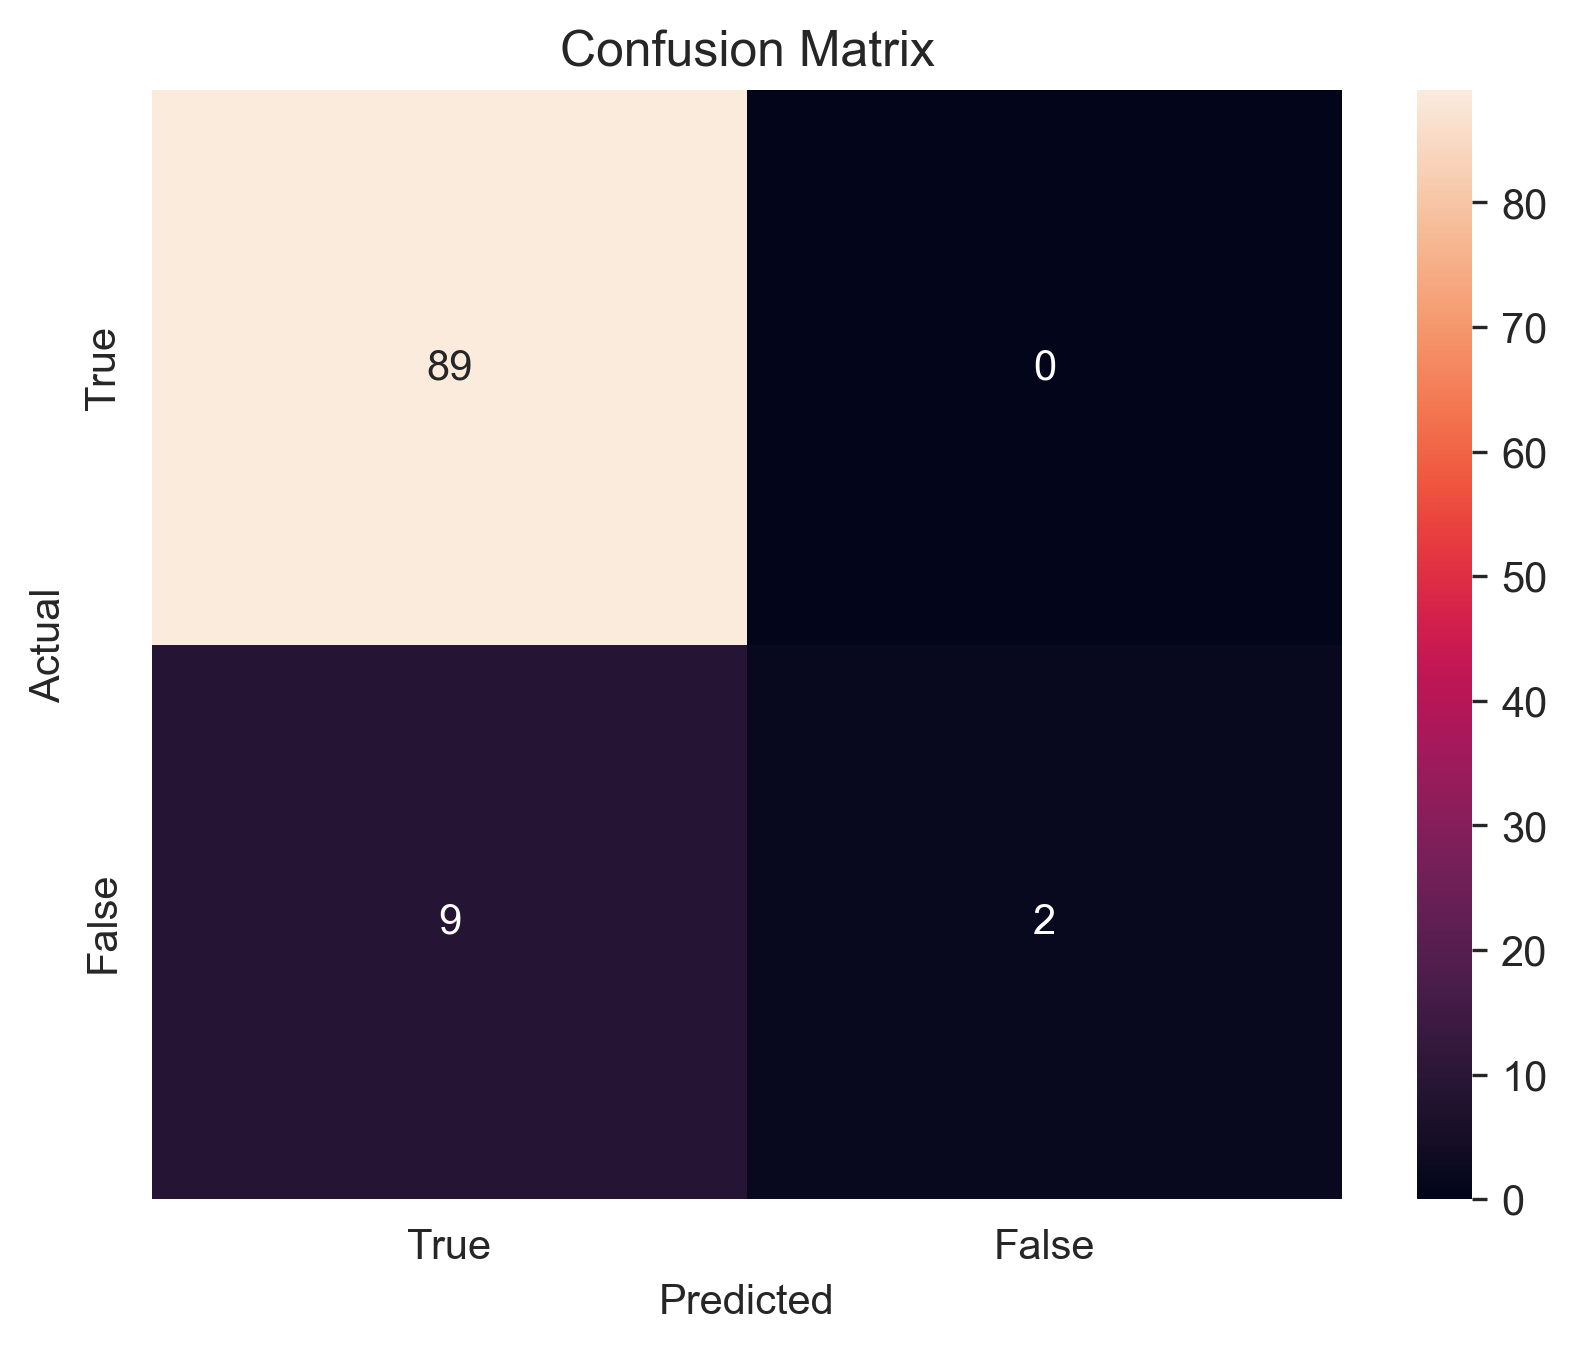

<Figure size 1920x1440 with 0 Axes>

In [ ]:
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', 
            xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

plt.savefig('log_model_2.png')

In [ ]:
importance = log_model_2.coef_[0]  
feature_names = X.columns  

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df['Absolute Importance'] = importance_df['Importance'].abs()
importance_df = importance_df.sort_values(by='Absolute Importance', ascending=False)
print(importance_df)

                  Feature  Importance  Absolute Importance
0        Batting_df_G_avg   -1.103126             1.103126
6        Batting_df_H_avg   -1.092026             1.092026
23    Batting_df_SO_total    0.952608             0.952608
27   Batting_df_HBP_total   -0.910172             0.910172
3     Batting_df_AB_total    0.873737             0.873737
13    Batting_df_HR_total    0.715998             0.715998
21    Batting_df_BB_total    0.610891             0.610891
2       Batting_df_AB_avg   -0.610742             0.610742
31    Batting_df_SF_total    0.574363             0.574363
29    Batting_df_SH_total    0.463377             0.463377
7      Batting_df_H_total   -0.416339             0.416339
32    Batting_df_GIDP_avg    0.394235             0.394235
26     Batting_df_HBP_avg    0.388605             0.388605
14     Batting_df_RBI_avg   -0.382161             0.382161
33  Batting_df_GIDP_total    0.354511             0.354511
24     Batting_df_IBB_avg    0.324229             0.3242

Feature engineering in post season stats

In [ ]:
Awards_Batting_HoF_df['BattingPost_df_G_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_G'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_G_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_G'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_AB_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_AB'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_AB_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_AB'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_R_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_R'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_R_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_R'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_H_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_H'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_H_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_H'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_2B_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_2B'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_2B_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_2B'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_3B_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['Batting_df_3B'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_3B_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_3B'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_HR_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_HR'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_HR_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_HR'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_RBI_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_RBI'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_RBI_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_RBI'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_SB_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_SB'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_SB_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_SB'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_CS_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_CS'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_CS_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_CS'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_BB_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_BB'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_BB_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_BB'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_SO_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_SO'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_SO_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_SO'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_IBB_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_IBB'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_IBB_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_IBB'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_HBP_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_HBP'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_HBP_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_HBP'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_SH_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_SH'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_SH_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_SH'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_SF_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_SF'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_SF_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_SF'].transform('sum')

Awards_Batting_HoF_df['BattingPost_df_GIDP_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_GIDP'].transform('mean')
Awards_Batting_HoF_df['BattingPost_df_GIDP_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_GIDP'].transform('sum')

C:\Users\cltro\AppData\Local\Temp\ipykernel_20736\2908066783.py:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Awards_Batting_HoF_df['BattingPost_df_SF_avg'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_SF'].transform('mean')
C:\Users\cltro\AppData\Local\Temp\ipykernel_20736\2908066783.py:47: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Awards_Batting_HoF_df['BattingPost_df_SF_total'] = Awards_Batting_HoF_df.groupby('playerID', observed=False)['BattingPost_df_SF'].transform('sum')
C:\Users\cltr

In [ ]:
print(Awards_Batting_HoF_df.columns.tolist())

['playerID', 'AllstarFull_df_yearID', 'AwardsPlayers_df_yearID', 'Batting_df_yearID', 'Batting_df_stint', 'Batting_df_teamID', 'Batting_df_lgID', 'Batting_df_G', 'Batting_df_AB', 'Batting_df_R', 'Batting_df_H', 'Batting_df_2B', 'Batting_df_3B', 'Batting_df_HR', 'Batting_df_RBI', 'Batting_df_SB', 'Batting_df_CS', 'Batting_df_BB', 'Batting_df_SO', 'Batting_df_IBB', 'Batting_df_HBP', 'Batting_df_SH', 'Batting_df_SF', 'Batting_df_GIDP', 'BattingPost_df_yearID', 'BattingPost_df_round', 'BattingPost_df_teamID', 'BattingPost_df_lgID', 'BattingPost_df_G', 'BattingPost_df_AB', 'BattingPost_df_R', 'BattingPost_df_H', 'BattingPost_df_2B', 'BattingPost_df_3B', 'BattingPost_df_HR', 'BattingPost_df_RBI', 'BattingPost_df_SB', 'BattingPost_df_CS', 'BattingPost_df_BB', 'BattingPost_df_SO', 'BattingPost_df_IBB', 'BattingPost_df_HBP', 'BattingPost_df_SH', 'BattingPost_df_SF', 'BattingPost_df_GIDP', 'HallOfFame_df_yearid', 'HallOfFame_df_inducted', 'Batting_df_G_avg', 'Batting_df_G_total', 'Batting_df_AB_

In [ ]:
eng_stats_df = Awards_Batting_HoF_df[['playerID','HallOfFame_df_inducted', 'Batting_df_G_avg', 'Batting_df_G_total', 'Batting_df_AB_avg', 'Batting_df_AB_total', 'Batting_df_R_avg', 'Batting_df_R_total', 'Batting_df_H_avg', 'Batting_df_H_total', 'Batting_df_2B_avg', 'Batting_df_2B_total', 'Batting_df_3B_avg', 'Batting_df_3B_total', 'Batting_df_HR_avg', 'Batting_df_HR_total', 'Batting_df_RBI_avg', 'Batting_df_RBI_total', 'Batting_df_SB_avg', 'Batting_df_SB_total', 'Batting_df_CS_avg', 'Batting_df_CS_total', 'Batting_df_BB_avg', 'Batting_df_BB_total', 'Batting_df_SO_avg', 'Batting_df_SO_total', 'Batting_df_IBB_avg', 'Batting_df_IBB_total', 'Batting_df_HBP_avg', 'Batting_df_HBP_total', 'Batting_df_SH_avg', 'Batting_df_SH_total', 'Batting_df_SF_avg', 'Batting_df_SF_total', 'Batting_df_GIDP_avg', 'Batting_df_GIDP_total', 'BattingPost_df_G_avg', 'BattingPost_df_G_total', 'BattingPost_df_AB_avg', 'BattingPost_df_AB_total', 'BattingPost_df_R_avg', 'BattingPost_df_R_total', 'BattingPost_df_H_avg', 'BattingPost_df_H_total', 'BattingPost_df_2B_avg', 'BattingPost_df_2B_total', 'BattingPost_df_3B_avg', 'BattingPost_df_3B_total', 'BattingPost_df_HR_avg', 'BattingPost_df_HR_total', 'BattingPost_df_RBI_avg', 'BattingPost_df_RBI_total', 'BattingPost_df_SB_avg', 'BattingPost_df_SB_total', 'BattingPost_df_CS_avg', 'BattingPost_df_CS_total', 'BattingPost_df_BB_avg', 'BattingPost_df_BB_total', 'BattingPost_df_SO_avg', 'BattingPost_df_SO_total', 'BattingPost_df_IBB_avg', 'BattingPost_df_IBB_total', 'BattingPost_df_HBP_avg', 'BattingPost_df_HBP_total', 'BattingPost_df_SH_avg', 'BattingPost_df_SH_total', 'BattingPost_df_SF_avg', 'BattingPost_df_SF_total', 'BattingPost_df_GIDP_avg', 'BattingPost_df_GIDP_total']]

In [ ]:
eng_stats_df = eng_stats_df.drop_duplicates(subset='playerID')
eng_stats_df.to_feather('eng_stats_df.feather')

In [ ]:
X = eng_stats_df[['Batting_df_G_avg', 'Batting_df_G_total', 'Batting_df_AB_avg', 'Batting_df_AB_total', 'Batting_df_R_avg', 'Batting_df_R_total', 'Batting_df_H_avg', 'Batting_df_H_total', 'Batting_df_2B_avg', 'Batting_df_2B_total', 'Batting_df_3B_avg', 'Batting_df_3B_total', 'Batting_df_HR_avg', 'Batting_df_HR_total', 'Batting_df_RBI_avg', 'Batting_df_RBI_total', 'Batting_df_SB_avg', 'Batting_df_SB_total', 'Batting_df_CS_avg', 'Batting_df_CS_total', 'Batting_df_BB_avg', 'Batting_df_BB_total', 'Batting_df_SO_avg', 'Batting_df_SO_total', 'Batting_df_IBB_avg', 'Batting_df_IBB_total', 'Batting_df_HBP_avg', 'Batting_df_HBP_total', 'Batting_df_SH_avg', 'Batting_df_SH_total', 'Batting_df_SF_avg', 'Batting_df_SF_total', 'Batting_df_GIDP_avg', 'Batting_df_GIDP_total', 'BattingPost_df_G_avg', 'BattingPost_df_G_total', 'BattingPost_df_AB_avg', 'BattingPost_df_AB_total', 'BattingPost_df_R_avg', 'BattingPost_df_R_total', 'BattingPost_df_H_avg', 'BattingPost_df_H_total', 'BattingPost_df_2B_avg', 'BattingPost_df_2B_total', 'BattingPost_df_3B_avg', 'BattingPost_df_3B_total', 'BattingPost_df_HR_avg', 'BattingPost_df_HR_total', 'BattingPost_df_RBI_avg', 'BattingPost_df_RBI_total', 'BattingPost_df_SB_avg', 'BattingPost_df_SB_total', 'BattingPost_df_CS_avg', 'BattingPost_df_CS_total', 'BattingPost_df_BB_avg', 'BattingPost_df_BB_total', 'BattingPost_df_SO_avg', 'BattingPost_df_SO_total', 'BattingPost_df_IBB_avg', 'BattingPost_df_IBB_total', 'BattingPost_df_HBP_avg', 'BattingPost_df_HBP_total', 'BattingPost_df_SH_avg', 'BattingPost_df_SH_total', 'BattingPost_df_SF_avg', 'BattingPost_df_SF_total', 'BattingPost_df_GIDP_avg', 'BattingPost_df_GIDP_total']]
y = eng_stats_df['HallOfFame_df_inducted']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model_3 = LogisticRegression()
log_model_3.fit(X_train_scaled, y_train)

y_pred = log_model_3.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[89  0]
 [ 9  2]]

Classification Report:
              precision    recall  f1-score   support

       False       0.91      1.00      0.95        89
        True       1.00      0.18      0.31        11

    accuracy                           0.91       100
   macro avg       0.95      0.59      0.63       100
weighted avg       0.92      0.91      0.88       100



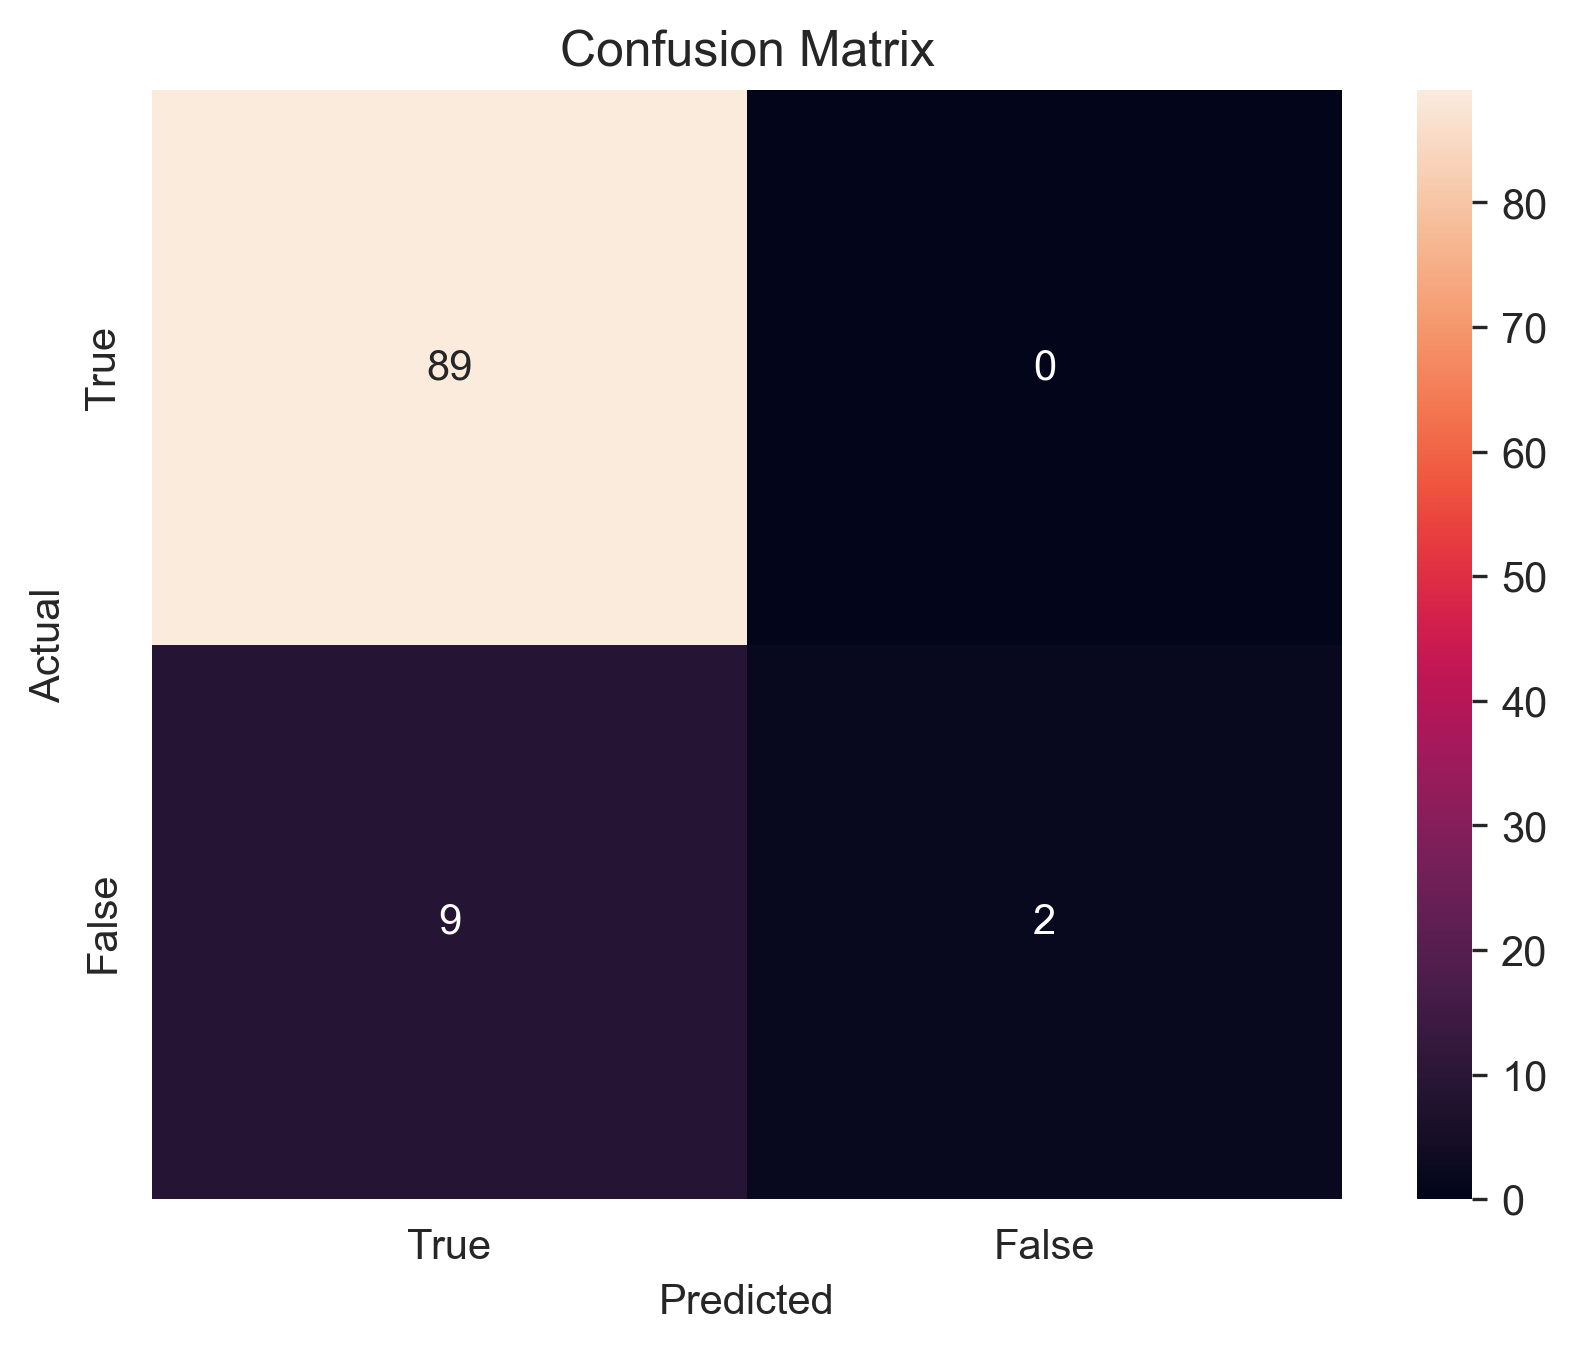

<Figure size 1920x1440 with 0 Axes>

In [ ]:
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', 
            xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

plt.savefig('log_model_3.png')

In [ ]:
importance = log_model_3.coef_[0]  
feature_names = X.columns  


importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df['Absolute Importance'] = importance_df['Importance'].abs()
importance_df = importance_df.sort_values(by='Absolute Importance', ascending=False)
print(importance_df.head(15))

                     Feature  Importance  Absolute Importance
6           Batting_df_H_avg   -1.325580             1.325580
3        Batting_df_AB_total    0.968851             0.968851
23       Batting_df_SO_total    0.892550             0.892550
27      Batting_df_HBP_total   -0.855013             0.855013
0           Batting_df_G_avg   -0.850449             0.850449
7         Batting_df_H_total   -0.827404             0.827404
13       Batting_df_HR_total    0.779090             0.779090
21       Batting_df_BB_total    0.774566             0.774566
41    BattingPost_df_H_total    0.735224             0.735224
50     BattingPost_df_SB_avg    0.706182             0.706182
51   BattingPost_df_SB_total   -0.664837             0.664837
59  BattingPost_df_IBB_total    0.663234             0.663234
31       Batting_df_SF_total    0.636577             0.636577
66   BattingPost_df_GIDP_avg   -0.595507             0.595507
2          Batting_df_AB_avg   -0.542426             0.542426
